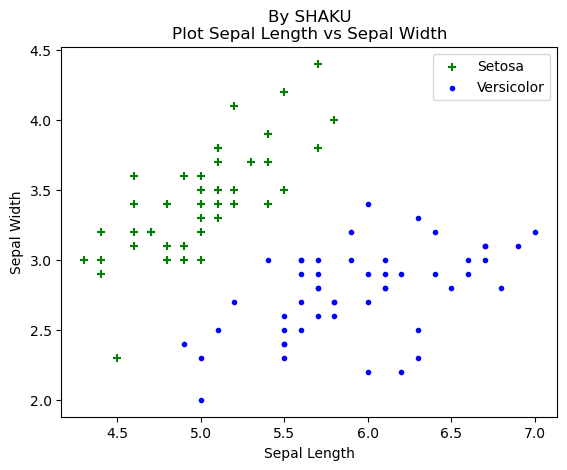

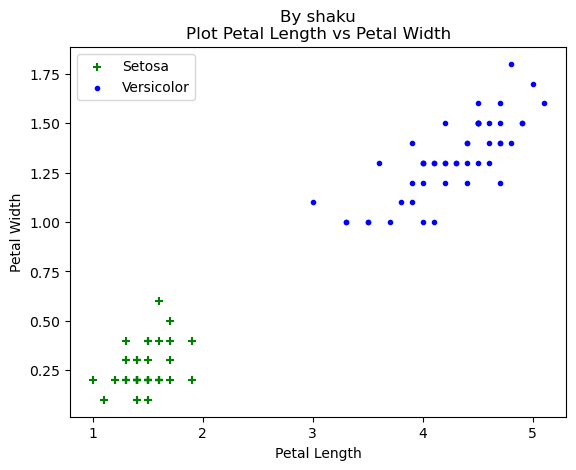

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVC(kernel='linear')

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Load Iris dataset
iris = load_iris()
# Create DataFrame from the Iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]
# Plot Sepal Length vs Sepal Width for different classes
plt.title("By SHAKU\nPlot Sepal Length vs Sepal Width")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.legend()
plt.show()
# Plot Petal Length vs Petal Width for different classes
plt.title("By shaku\nPlot Petal Length vs Petal Width")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.legend()
plt.show()

X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train SVM model (default parameters)
model = SVC()
model.fit(X_train, y_train)
model.predict([[4.8, 3.0, 1.5, 0.3]])
model_C_1 = SVC(C=1)
model_C_1.fit(X_train, y_train)
model_C_10 = SVC(C=10)
model_C_10.fit(X_train, y_train)
model_g_10 = SVC(gamma=10)
model_g_10.fit(X_train, y_train)
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)


In [3]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = df.drop(['target'], axis='columns')
y = df.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the GUI window
window = tk.Tk()
window.title("Iris Flower Classification by shaku")
window.geometry("400x400")
# Create input fields for features
labels = ["Sepal Length:", "Sepal Width:", "Petal Length:", "Petal Width:"]
entries = []
for i, label_text in enumerate(labels):
    label = ttk.Label(window, text=label_text)
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)
# Create a dropdown menu for kernel selection
kernel_label = ttk.Label(window, text="Kernel:")
kernel_label.grid(row=4, column=0, padx=5, pady=5)
kernel_var = tk.StringVar(value="rbf")  # Default kernel
kernel_options = ["linear", "poly", "rbf", "sigmoid"]
kernel_dropdown = ttk.Combobox(window, textvariable=kernel_var, values=kernel_options)
kernel_dropdown.grid(row=4, column=1, padx=5, pady=5)
# Create a slider for regularization parameter (C)
c_label = ttk.Label(window, text="Regularization (C):")
c_label.grid(row=5, column=0, padx=5, pady=5)
c_var = tk.DoubleVar(value=1.0)  # Default C value
c_slider = ttk.Scale(window, from_=0.1, to=10.0, variable=c_var, orient="horizontal")
c_slider.grid(row=5, column=1, padx=5, pady=5)
# Create a button to predict
def predict():
    try:
        # Get input values and parameters
        input_values = [float(entry.get()) for entry in entries]
        kernel = kernel_var.get()
        c_value = c_var.get()
        # Create and train the model with selected parameters
        model = SVC(kernel=kernel, C=c_value)
        model.fit(X_train, y_train)
        # Make prediction
        prediction = model.predict([input_values])[0]
        flower_name = iris.target_names[prediction]
        # Display prediction
        result_label.config(text="Prediction: " + flower_name)
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")

# Create a button to predict
predict_button = ttk.Button(window, text="Predict", command=predict)
predict_button.grid(row=6, column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the prediction
result_label = ttk.Label(window, text="")
result_label.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

# Create a reset button to clear inputs
def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")
    kernel_var.set("rbf")
    c_var.set(1.0)
    c_slider.set(1.0)

reset_button = ttk.Button(window, text="Reset", command=reset)
reset_button.grid(row=8, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [4]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Select fewer features correctly
X = df[['age', 'bmi', 'bp', 's5']]  # 'bp' is blood pressure and 's5' is a selected feature
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GUI window
window = tk.Tk()
window.title("Diabetes Progression Prediction BY shaku")
window.geometry("400x400")

# Create input fields for selected features
labels = {
    'age': "Age (years)",
    'bmi': "Body Mass Index (BMI)",
    'bp': "Blood Pressure (mm Hg)",
    's5': "S5 Measurement"
}

entries = []
for i, (key, label_text) in enumerate(labels.items()):
    label = ttk.Label(window, text=label_text + ":")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create a button to predict
def predict():
    try:
        # Get input values
        input_values = [float(entry.get()) for entry in entries]
        # Create and train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Make prediction
        prediction = model.predict([input_values])[0]
        # Display prediction
        result_label.config(text="Disease Progression: {:.2f}".format(prediction))
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")

# Create a button to predict
predict_button = ttk.Button(window, text="Predict", command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the prediction
result_label = ttk.Label(window, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, padx=5, pady=5)

# Create a reset button to clear inputs
def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")

reset_button = ttk.Button(window, text="Reset", command=reset)
reset_button.grid(row=len(labels) + 2, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
